In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [31]:
df = pd.read_csv("loan_dataset.csv")

In [32]:
df.head()

,age,income,balance,target_score
0,39.6,52000.0,1300.0,75.2
1,41.2,48000.0,2100.0,73.8
2,NaN,50500.0,1600.0,70.1
3,33.4,53000.0,NaN,68.3
4,55.1,61000.0,3200.0,90.5


In [33]:
df = df.rename(columns={'target_score':'credit_score'})

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           210 non-null    float64
 1   income        225 non-null    float64
 2   balance       224 non-null    float64
 3   credit_score  227 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.isna().sum()

age             17
income           2
balance          3
credit_score     0
dtype: int64

In [37]:
df.describe()

,age,income,balance,credit_score
count,210.000000,225.000000,224.000000,227.000000
mean,42.048095,52440.000000,2270.982143,75.144934
std,8.545382,10547.498857,1550.468444,16.469495
min,28.400000,39000.000000,900.000000,52.100000
25%,34.625000,46000.000000,1400.000000,63.550000
50%,41.850000,51000.000000,1800.000000,73.600000
75%,48.875000,58000.000000,2600.000000,85.600000
max,57.700000,150000.000000,11000.000000,160.300000


<Axes: xlabel='age', ylabel='Count'>

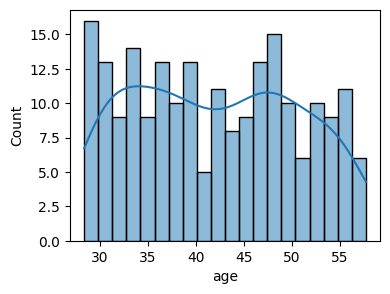

In [38]:
plt.figure(figsize=(4,3))
sns.histplot(df['age'], kde=True, bins=20)

<Axes: ylabel='age'>

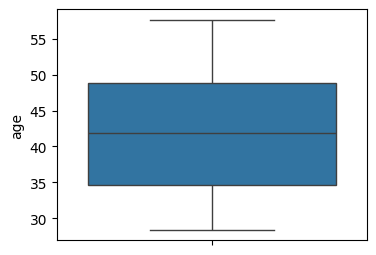

In [39]:
plt.figure(figsize=(4,3))
sns.boxplot(df['age'])

<Axes: xlabel='income', ylabel='Count'>

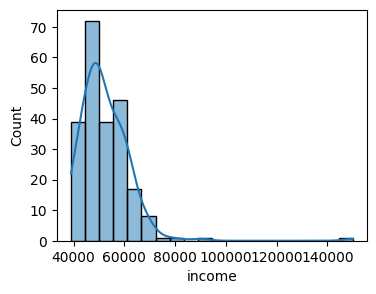

In [40]:
plt.figure(figsize=(4,3))
sns.histplot(df['income'], kde=True, bins=20)

<Axes: ylabel='income'>

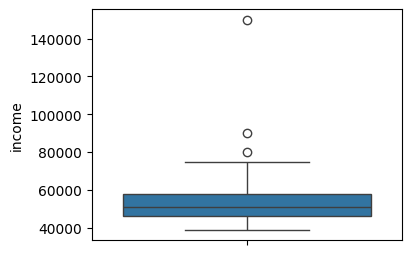

In [41]:
plt.figure(figsize=(4,3))
sns.boxplot(df['income'])

<Axes: xlabel='balance', ylabel='Count'>

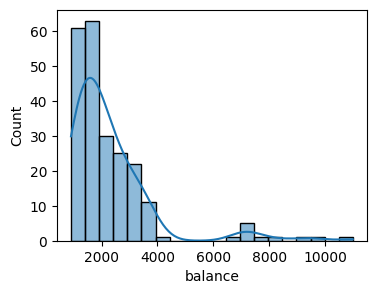

In [42]:
plt.figure(figsize=(4,3))
sns.histplot(df['balance'], kde=True, bins=20)

<Axes: ylabel='balance'>

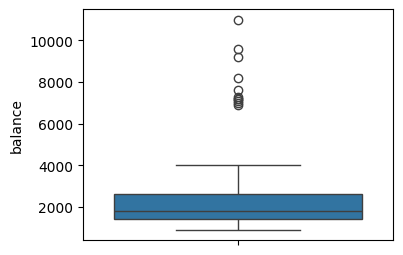

In [43]:
plt.figure(figsize=(4,3))
sns.boxplot(df['balance'])

In [44]:
df.shape

(227, 4)

In [62]:
def outlier(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)

    iqr = q3 - q1

    lower_wh = q1 - 1.5 * iqr
    upper_wh = q3 + 1.5 * iqr

    return df[(df[col] >= lower_wh) & (df[col] <= upper_wh)]

In [63]:
nums_col = ['age', 'income', 'balance']

In [64]:
df_clean = df.copy()

In [65]:
for col1 in nums_col:
    df_clean = outlier(df, col1)

In [66]:
df = df_clean.copy()

In [67]:
df.shape

(213, 4)

<Axes: ylabel='income'>

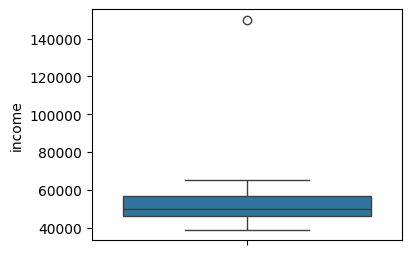

In [68]:
plt.figure(figsize=(4,3))
sns.boxplot(df['income'])

<Axes: ylabel='income'>

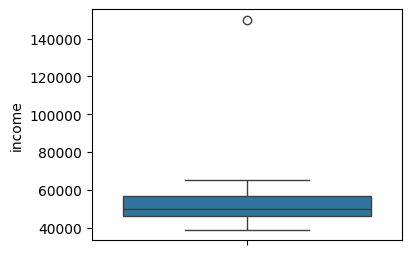

In [69]:
plt.figure(figsize=(4,3))
sns.boxplot(df['income'])